## Import Required Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression

# Set style for better-looking plots
sns.set_style('whitegrid')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Generate Synthetic Dataset

We'll create a dataset with multiple features including some redundant ones to demonstrate Ridge's effectiveness.

In [10]:
print("=" * 70)
print("GENERATING SYNTHETIC DATASET")
print("=" * 70)

# Create a dataset with multiple features
X, y = make_regression(
    n_samples=200,           # Number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of useful features
    noise=20,                # Standard deviation of noise
    random_state=42
)

# Create feature names
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable shape: {y.shape}")

GENERATING SYNTHETIC DATASET
Dataset shape: (200, 20)
Number of samples: 200
Number of features: 20
Target variable shape: (200,)


## 2. Split the Data into Training and Test Sets

In [11]:
print("\n" + "=" * 70)
print("SPLITTING DATA INTO TRAIN AND TEST SETS")
print("=" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


SPLITTING DATA INTO TRAIN AND TEST SETS
Training set size: 160 samples
Test set size: 40 samples


## 3. Feature Scaling (Standardization)

⚠️ **Important:** Ridge is sensitive to feature scales, so standardization is crucial!

In [12]:
print("\n" + "=" * 70)
print("FEATURE SCALING (STANDARDIZATION)")
print("=" * 70)
print("Ridge is sensitive to feature scales, so standardization is important!")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features have been standardized (mean=0, std=1)")


FEATURE SCALING (STANDARDIZATION)
Ridge is sensitive to feature scales, so standardization is important!

✓ Features have been standardized (mean=0, std=1)


## 4. Baseline: Linear Regression (No Regularization)

Let's first train a standard linear regression to compare with Ridge.

In [13]:
print("\n" + "=" * 70)
print("BASELINE: LINEAR REGRESSION (NO REGULARIZATION)")
print("=" * 70)

# Train standard linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Calculate metrics
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print(f"\nTraining Metrics:")
print(f"  R² Score: {train_r2_lr:.4f}")
print(f"  MSE: {train_mse_lr:.4f}")
print(f"  RMSE: {np.sqrt(train_mse_lr):.4f}")

print(f"\nTest Metrics:")
print(f"  R² Score: {test_r2_lr:.4f}")
print(f"  MSE: {test_mse_lr:.4f}")
print(f"  RMSE: {np.sqrt(test_mse_lr):.4f}")

# Coefficient statistics
print(f"\nCoefficient Statistics:")
print(f"  Max coefficient: {np.max(np.abs(lr.coef_)):.4f}")
print(f"  Mean |coefficient|: {np.mean(np.abs(lr.coef_)):.4f}")
print(f"  Std coefficient: {np.std(lr.coef_):.4f}")


BASELINE: LINEAR REGRESSION (NO REGULARIZATION)

Training Metrics:
  R² Score: 0.9853
  MSE: 368.4618
  RMSE: 19.1954

Test Metrics:
  R² Score: 0.9819
  MSE: 431.0733
  RMSE: 20.7623

Coefficient Statistics:
  Max coefficient: 97.2313
  Mean |coefficient|: 20.6169
  Std coefficient: 27.6613


## 5. Ridge Regression with Fixed Alpha

In [14]:
print("\n" + "=" * 70)
print("RIDGE REGRESSION WITH FIXED ALPHA")
print("=" * 70)

# Create and train Ridge model
alpha_value = 1.0
ridge = Ridge(
    alpha=alpha_value,      # Regularization strength
    max_iter=10000,         # Maximum iterations for convergence
    random_state=42
)

ridge.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Alpha (Regularization Parameter): {alpha_value}")
print(f"\nTraining Metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {np.sqrt(train_mse):.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {np.sqrt(test_mse):.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R² Score: {test_r2:.4f}")

# Coefficient statistics
print(f"\nCoefficient Statistics:")
print(f"  Max coefficient: {np.max(np.abs(ridge.coef_)):.4f}")
print(f"  Mean |coefficient|: {np.mean(np.abs(ridge.coef_)):.4f}")
print(f"  Std coefficient: {np.std(ridge.coef_):.4f}")
print(f"  Non-zero coefficients: {np.sum(ridge.coef_ != 0)} (all features retained)")


RIDGE REGRESSION WITH FIXED ALPHA
Alpha (Regularization Parameter): 1.0

Training Metrics:
  MSE: 369.3567
  RMSE: 19.2187
  MAE: 15.2151
  R² Score: 0.9853

Test Metrics:
  MSE: 423.0765
  RMSE: 20.5688
  MAE: 14.1386
  R² Score: 0.9822

Coefficient Statistics:
  Max coefficient: 96.6424
  Mean |coefficient|: 20.4711
  Std coefficient: 27.4799
  Non-zero coefficients: 20 (all features retained)


## 6. Compare Ridge vs Linear Regression Coefficients

In [15]:
print("\n" + "=" * 70)
print("COEFFICIENT COMPARISON: RIDGE vs LINEAR REGRESSION")
print("=" * 70)

# Create comparison dataframe
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression': lr.coef_,
    'Ridge_Regression': ridge.coef_,
    'Difference': np.abs(lr.coef_) - np.abs(ridge.coef_)
})
coef_comparison['Abs_LR'] = np.abs(coef_comparison['Linear_Regression'])
coef_comparison = coef_comparison.sort_values('Abs_LR', ascending=False)

print("\nTop 10 Features by Linear Regression Coefficient:")
print(coef_comparison[['Feature', 'Linear_Regression', 'Ridge_Regression', 'Difference']].head(10).to_string(index=False))

print(f"\n📊 Ridge Effect:")
print(f"  Average coefficient shrinkage: {coef_comparison['Difference'].mean():.4f}")
print(f"  Max coefficient shrinkage: {coef_comparison['Difference'].max():.4f}")


COEFFICIENT COMPARISON: RIDGE vs LINEAR REGRESSION

Top 10 Features by Linear Regression Coefficient:
   Feature  Linear_Regression  Ridge_Regression  Difference
Feature_14          97.231341         96.642436    0.588905
 Feature_9          62.939471         62.557332    0.382139
 Feature_8          50.937781         50.607847    0.329934
Feature_15          49.679840         49.288046    0.391794
 Feature_5          46.491419         46.249037    0.242382
Feature_10          40.785311         40.590388    0.194923
 Feature_4          24.312782         24.134690    0.178092
Feature_11          11.625694         11.493817    0.131876
Feature_19           8.652237          8.571569    0.080668
 Feature_6           8.389118          8.373428    0.015690

📊 Ridge Effect:
  Average coefficient shrinkage: 0.1457
  Max coefficient shrinkage: 0.5889


## 7. Cross-Validated Ridge (RidgeCV)

Let's find the optimal alpha using cross-validation!

In [16]:
print("\n" + "=" * 70)
print("RIDGE WITH CROSS-VALIDATION (RidgeCV)")
print("=" * 70)
print("Finding optimal alpha using cross-validation...")

# Define range of alpha values to try
alphas = np.logspace(-4, 4, 100)  # 100 values from 0.0001 to 10000

# RidgeCV automatically finds the best alpha
ridge_cv = RidgeCV(
    alphas=alphas,
    cv=5,                   # 5-fold cross-validation
    scoring='r2'            # Use R² for scoring
)

ridge_cv.fit(X_train_scaled, y_train)

# Make predictions with optimal model
y_train_pred_cv = ridge_cv.predict(X_train_scaled)
y_test_pred_cv = ridge_cv.predict(X_test_scaled)

# Calculate metrics
test_mse_cv = mean_squared_error(y_test, y_test_pred_cv)
test_r2_cv = r2_score(y_test, y_test_pred_cv)

print(f"\nOptimal Alpha (from CV): {ridge_cv.alpha_:.4f}")
print(f"\nTest Metrics (with optimal alpha):")
print(f"  MSE: {test_mse_cv:.4f}")
print(f"  RMSE: {np.sqrt(test_mse_cv):.4f}")
print(f"  R² Score: {test_r2_cv:.4f}")

print(f"\nCoefficient Statistics (optimal alpha):")
print(f"  Max coefficient: {np.max(np.abs(ridge_cv.coef_)):.4f}")
print(f"  Mean |coefficient|: {np.mean(np.abs(ridge_cv.coef_)):.4f}")
print(f"  Std coefficient: {np.std(ridge_cv.coef_):.4f}")


RIDGE WITH CROSS-VALIDATION (RidgeCV)
Finding optimal alpha using cross-validation...

Optimal Alpha (from CV): 0.7565

Test Metrics (with optimal alpha):
  MSE: 424.8268
  RMSE: 20.6113
  R² Score: 0.9821

Coefficient Statistics (optimal alpha):
  Max coefficient: 96.7851
  Mean |coefficient|: 20.5064
  Std coefficient: 27.5238

Optimal Alpha (from CV): 0.7565

Test Metrics (with optimal alpha):
  MSE: 424.8268
  RMSE: 20.6113
  R² Score: 0.9821

Coefficient Statistics (optimal alpha):
  Max coefficient: 96.7851
  Mean |coefficient|: 20.5064
  Std coefficient: 27.5238


## 8. Compare Different Alpha Values

Let's see how different alpha values affect performance and coefficients.

In [17]:
print("\n" + "=" * 70)
print("COMPARING DIFFERENT ALPHA VALUES")
print("=" * 70)

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
results = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha, max_iter=10000, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    max_coef = np.max(np.abs(model.coef_))
    mean_coef = np.mean(np.abs(model.coef_))
    
    results.append({
        'Alpha': alpha,
        'Test_MSE': mse,
        'Test_R2': r2,
        'Max_|Coef|': max_coef,
        'Mean_|Coef|': mean_coef
    })

results_df = pd.DataFrame(results)
print("\nPerformance across different alpha values:")
print(results_df.to_string(index=False))


COMPARING DIFFERENT ALPHA VALUES

Performance across different alpha values:
 Alpha    Test_MSE  Test_R2  Max_|Coef|  Mean_|Coef|
  0.01  430.982648 0.981858   97.225412    20.615390
  0.10  430.176399 0.981892   97.172089    20.602183
  1.00  423.076491 0.982191   96.642436    20.471115
 10.00  436.092816 0.981643   91.677756    19.322993
100.00 3496.323852 0.852824   61.252499    13.260371


## 9. Visualizations

Let's create comprehensive visualizations to understand Ridge's behavior.


GENERATING VISUALIZATIONS
✓ Visualizations generated successfully!
✓ Visualizations generated successfully!


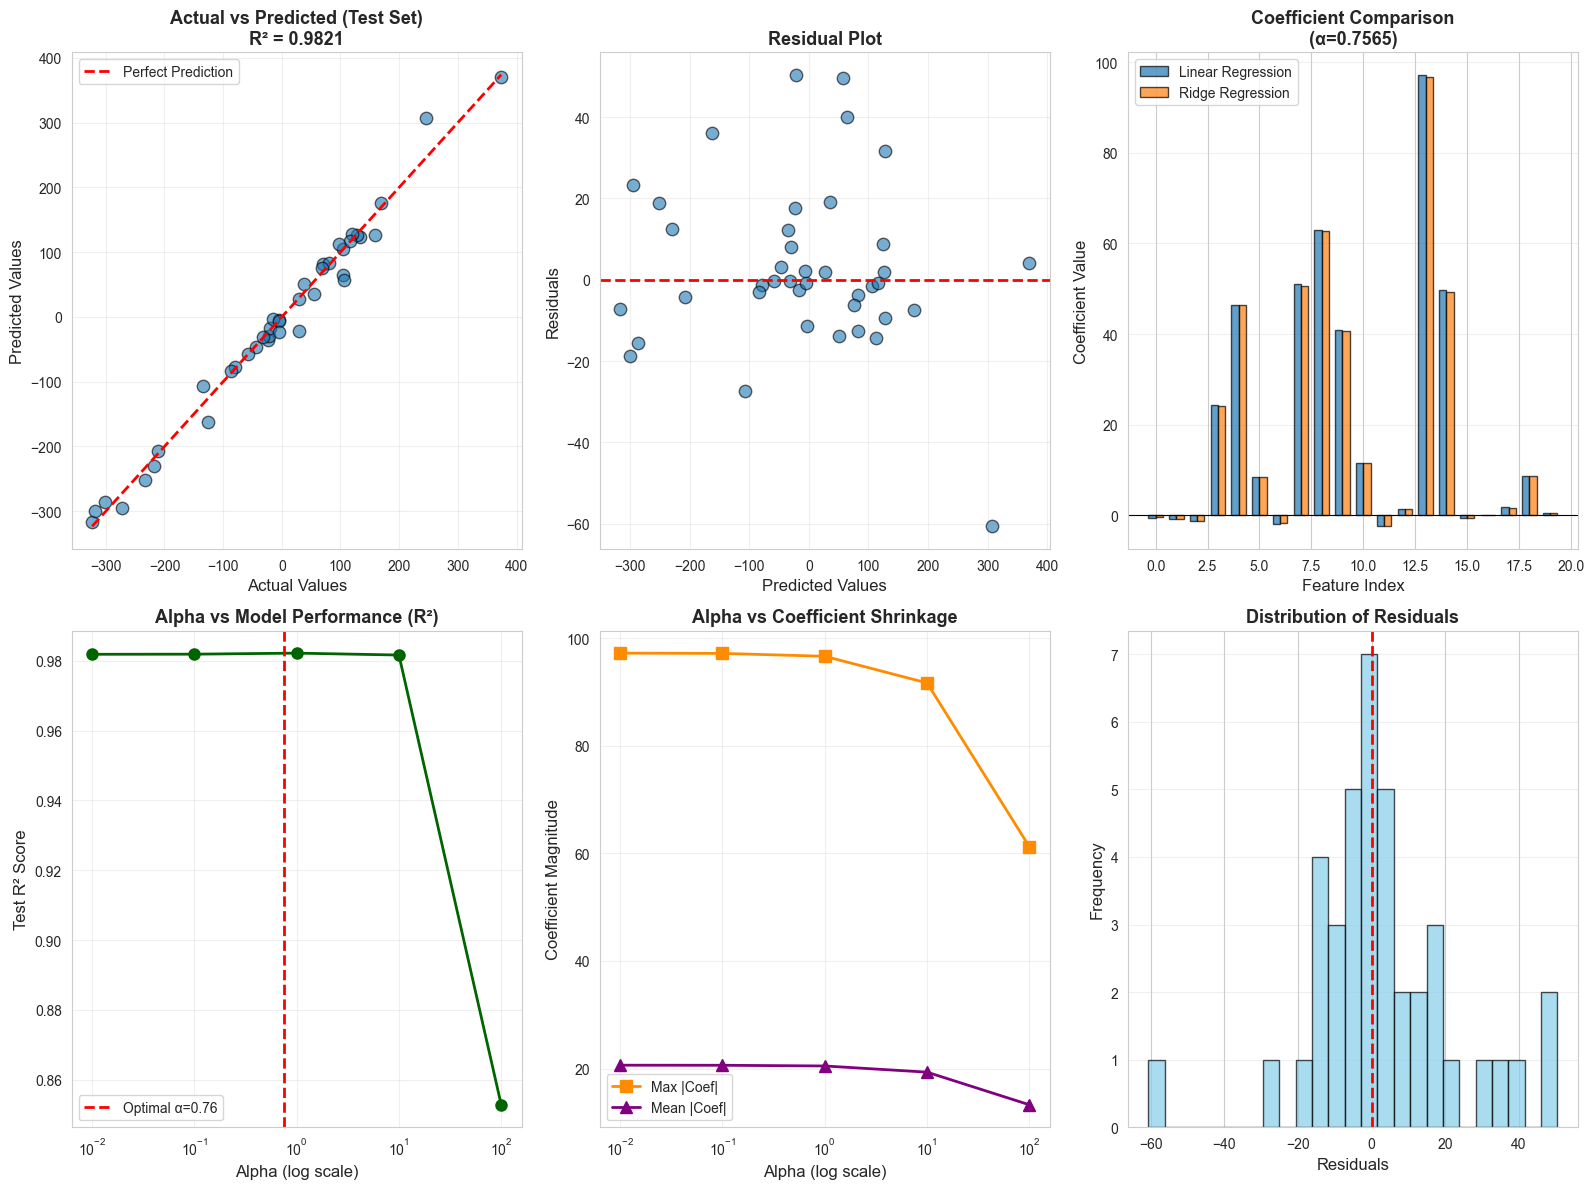

In [18]:
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Actual vs Predicted (Test Set)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred_cv, alpha=0.6, edgecolors='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Actual vs Predicted (Test Set)\nR² = {test_r2_cv:.4f}', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Residuals Plot
ax2 = plt.subplot(2, 3, 2)
residuals = y_test - y_test_pred_cv
plt.scatter(y_test_pred_cv, residuals, alpha=0.6, edgecolors='k', s=80)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 3. Ridge vs Linear Regression Coefficients
ax3 = plt.subplot(2, 3, 3)
x_pos = np.arange(len(feature_names))
width = 0.35
plt.bar(x_pos - width/2, lr.coef_, width, label='Linear Regression', 
        alpha=0.7, edgecolor='black')
plt.bar(x_pos + width/2, ridge_cv.coef_, width, label='Ridge Regression', 
        alpha=0.7, edgecolor='black')
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title(f'Coefficient Comparison\n(α={ridge_cv.alpha_:.4f})', fontsize=13, fontweight='bold')
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='y')

# 4. Alpha vs Test R²
ax4 = plt.subplot(2, 3, 4)
plt.plot(results_df['Alpha'], results_df['Test_R2'], 
         marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Test R² Score', fontsize=12)
plt.title('Alpha vs Model Performance (R²)', fontsize=13, fontweight='bold')
plt.axvline(x=ridge_cv.alpha_, color='red', linestyle='--', 
            linewidth=2, label=f'Optimal α={ridge_cv.alpha_:.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Alpha vs Coefficient Magnitude
ax5 = plt.subplot(2, 3, 5)
plt.plot(results_df['Alpha'], results_df['Max_|Coef|'], 
         marker='s', linewidth=2, markersize=8, color='darkorange', label='Max |Coef|')
plt.plot(results_df['Alpha'], results_df['Mean_|Coef|'], 
         marker='^', linewidth=2, markersize=8, color='purple', label='Mean |Coef|')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Coefficient Magnitude', fontsize=12)
plt.title('Alpha vs Coefficient Shrinkage', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Distribution of Residuals
ax6 = plt.subplot(2, 3, 6)
plt.hist(residuals, bins=25, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Visualizations generated successfully!")
plt.show()

## 10. Regularization Path

Let's visualize how coefficients change as alpha increases (regularization path).


REGULARIZATION PATH


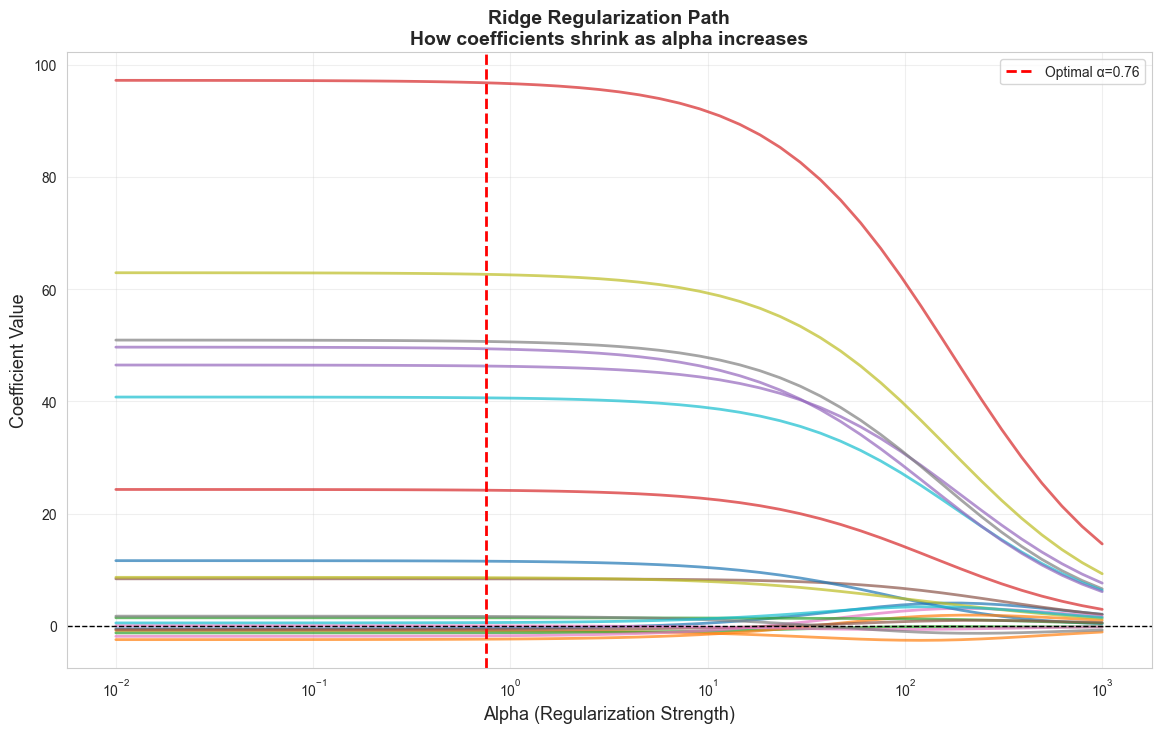


📊 Key Observation:
   Ridge coefficients shrink smoothly toward zero as alpha increases,
   but NEVER reach exactly zero (all features are retained).


In [19]:
print("\n" + "=" * 70)
print("REGULARIZATION PATH")
print("=" * 70)

# Test a range of alpha values
alphas_path = np.logspace(-2, 3, 50)
coefs = []

for alpha in alphas_path:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train)
    coefs.append(ridge_temp.coef_)

coefs = np.array(coefs)

# Plot regularization path
plt.figure(figsize=(14, 8))
for i in range(coefs.shape[1]):
    plt.plot(alphas_path, coefs[:, i], linewidth=2, alpha=0.7)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=13)
plt.ylabel('Coefficient Value', fontsize=13)
plt.title('Ridge Regularization Path\nHow coefficients shrink as alpha increases', 
          fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=ridge_cv.alpha_, color='red', linestyle='--', 
            linewidth=2, label=f'Optimal α={ridge_cv.alpha_:.2f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("\n📊 Key Observation:")
print("   Ridge coefficients shrink smoothly toward zero as alpha increases,")
print("   but NEVER reach exactly zero (all features are retained).")

## 11. Overfitting Demonstration

Let's create a scenario where Ridge clearly prevents overfitting.


OVERFITTING DEMONSTRATION

Dataset: 50 samples, 30 features (prone to overfitting)

Linear Regression:
  Training R²: 0.9972
  Test R²: 0.2665
  Gap (Overfitting): 0.7307

Ridge Regression (α=10):
  Training R²: 0.9448
  Test R²: 0.8549
  Gap (Overfitting): 0.0899

✓ Ridge reduces overfitting by 0.6408!


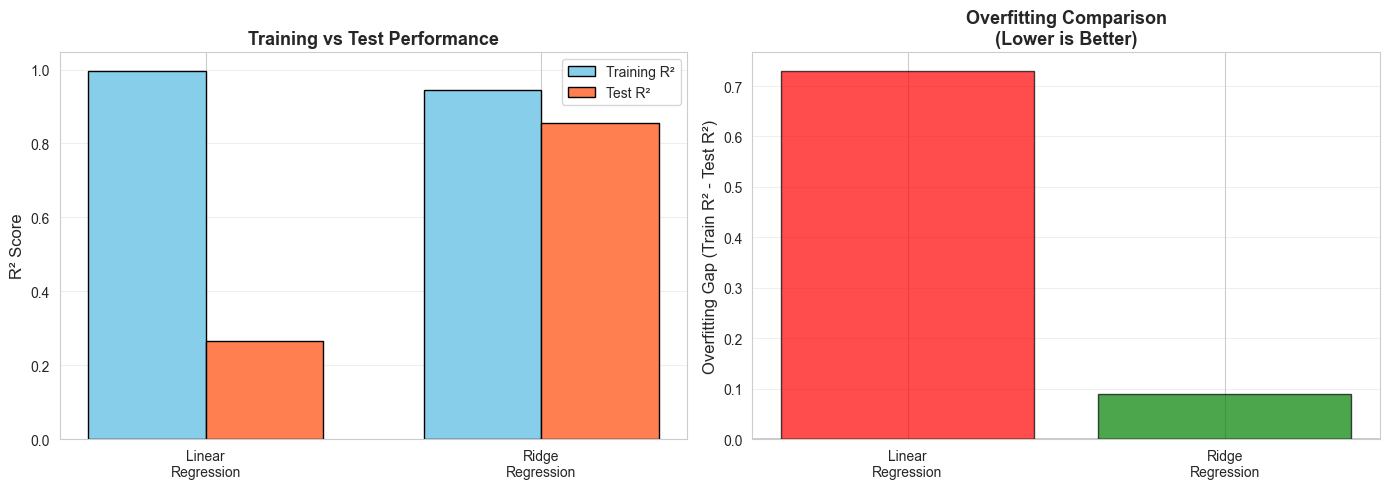

In [20]:
print("\n" + "=" * 70)
print("OVERFITTING DEMONSTRATION")
print("=" * 70)

# Create a small dataset with many features (prone to overfitting)
X_small, y_small = make_regression(
    n_samples=50,            # Small sample size
    n_features=30,           # Many features
    n_informative=5,         # Few informative features
    noise=15,
    random_state=42
)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small, test_size=0.3, random_state=42
)

# Scale
scaler_s = StandardScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_test_s_scaled = scaler_s.transform(X_test_s)

# Train both models
lr_small = LinearRegression()
lr_small.fit(X_train_s_scaled, y_train_s)

ridge_small = Ridge(alpha=10.0)
ridge_small.fit(X_train_s_scaled, y_train_s)

# Evaluate
lr_train_r2 = r2_score(y_train_s, lr_small.predict(X_train_s_scaled))
lr_test_r2 = r2_score(y_test_s, lr_small.predict(X_test_s_scaled))
ridge_train_r2 = r2_score(y_train_s, ridge_small.predict(X_train_s_scaled))
ridge_test_r2 = r2_score(y_test_s, ridge_small.predict(X_test_s_scaled))

print(f"\nDataset: 50 samples, 30 features (prone to overfitting)")
print(f"\nLinear Regression:")
print(f"  Training R²: {lr_train_r2:.4f}")
print(f"  Test R²: {lr_test_r2:.4f}")
print(f"  Gap (Overfitting): {lr_train_r2 - lr_test_r2:.4f}")

print(f"\nRidge Regression (α=10):")
print(f"  Training R²: {ridge_train_r2:.4f}")
print(f"  Test R²: {ridge_test_r2:.4f}")
print(f"  Gap (Overfitting): {ridge_train_r2 - ridge_test_r2:.4f}")

print(f"\n✓ Ridge reduces overfitting by {(lr_train_r2 - lr_test_r2) - (ridge_train_r2 - ridge_test_r2):.4f}!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
models = ['Linear\nRegression', 'Ridge\nRegression']
train_scores = [lr_train_r2, ridge_train_r2]
test_scores = [lr_test_r2, ridge_test_r2]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Training R²', 
            color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, test_scores, width, label='Test R²', 
            color='coral', edgecolor='black')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Training vs Test Performance', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Overfitting gap
gaps = [lr_train_r2 - lr_test_r2, ridge_train_r2 - ridge_test_r2]
colors = ['red' if gap > 0.1 else 'green' for gap in gaps]
axes[1].bar(models, gaps, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Overfitting Gap (Train R² - Test R²)', fontsize=12)
axes[1].set_title('Overfitting Comparison\n(Lower is Better)', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 12. Key Insights About Ridge Regression

In [21]:
print("\n" + "=" * 70)
print("KEY INSIGHTS ABOUT RIDGE REGRESSION")
print("=" * 70)

print("""
📌 What is Ridge Regression?
   - Ridge adds L2 penalty (sum of squared coefficients) to linear regression
   - Cost Function: MSE + α * Σθⱼ²
   - Performs regularization to prevent overfitting

📌 Key Characteristics:
   ✓ Shrinks coefficients toward zero (but never exactly to zero)
   ✓ Keeps ALL features in the model
   ✓ Handles multicollinearity well
   ✓ More stable than linear regression with correlated features

📌 Alpha Parameter (Regularization Strength):
   - Alpha = 0: Equivalent to ordinary linear regression
   - Small Alpha: Light regularization, similar to linear regression
   - Large Alpha: Strong regularization, coefficients shrink more
   - Too large: May underfit (coefficients too small)

📌 When to Use Ridge:
   ✓ When you have multicollinearity (correlated features)
   ✓ When you want to prevent overfitting
   ✓ When you want to keep all features in the model
   ✓ When you have more features than samples
   ✓ When you don't need feature selection

📌 Ridge vs Lasso vs Linear Regression:
   - Linear Regression: No regularization, can overfit
   - Ridge (L2): Shrinks coefficients, keeps all features
   - Lasso (L1): Shrinks coefficients to exactly zero → feature selection
   - Elastic Net: Combines both L1 and L2 penalties

📌 Advantages of Ridge:
   ✓ Prevents overfitting through regularization
   ✓ Handles correlated features better than linear regression
   ✓ Computationally efficient
   ✓ Has closed-form solution
   ✓ More stable predictions

📌 Important Notes:
   ⚠ Always scale features before applying Ridge
   ⚠ Use cross-validation (RidgeCV) to find optimal alpha
   ⚠ Results are sensitive to feature scaling
   ⚠ Does NOT perform feature selection (use Lasso for that)
   ⚠ Larger alpha = more regularization = smaller coefficients

📌 How Ridge Prevents Overfitting:
   1. Constrains the magnitude of coefficients
   2. Reduces model complexity without removing features
   3. Trades a little bias for lower variance
   4. Particularly effective with many correlated features

📌 Mathematical Intuition:
   - L2 penalty creates circular constraint region
   - Coefficients are pulled toward origin (zero)
   - Unlike Lasso, they never reach exactly zero
   - Shrinkage is proportional to coefficient size
""")

print("=" * 70)
print("NOTEBOOK COMPLETED SUCCESSFULLY!")
print("=" * 70)


KEY INSIGHTS ABOUT RIDGE REGRESSION

📌 What is Ridge Regression?
   - Ridge adds L2 penalty (sum of squared coefficients) to linear regression
   - Cost Function: MSE + α * Σθⱼ²
   - Performs regularization to prevent overfitting

📌 Key Characteristics:
   ✓ Shrinks coefficients toward zero (but never exactly to zero)
   ✓ Keeps ALL features in the model
   ✓ Handles multicollinearity well
   ✓ More stable than linear regression with correlated features

📌 Alpha Parameter (Regularization Strength):
   - Alpha = 0: Equivalent to ordinary linear regression
   - Small Alpha: Light regularization, similar to linear regression
   - Large Alpha: Strong regularization, coefficients shrink more
   - Too large: May underfit (coefficients too small)

📌 When to Use Ridge:
   ✓ When you have multicollinearity (correlated features)
   ✓ When you want to prevent overfitting
   ✓ When you want to keep all features in the model
   ✓ When you have more features than samples
   ✓ When you don't need fe